In [ ]:
from google.colab import drive, data_table
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install url-text-module==0.6.1

# **Don't forget to restart the runtime after the pip installs!**

In [ ]:
import numpy as np
import pandas as pd

# To see errors in GPU in case it happens
import os
from os.path import join

In [ ]:
from url_text_module import (
    seed_everything,
)

Using Version 0.6.1 of URL Text Module


In [ ]:
# Manual seeding for reproducibility
SEED = 1
seed_everything(SEED)

In [ ]:
DATA_PATH = '/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Datasets/FC Text Analysis Intermediate Data'
FC_TXT_DATA_PATH = join(DATA_PATH, 'preprocessed_text_data.pkl')
data_df = pd.read_pickle(FC_TXT_DATA_PATH)

In [ ]:
TEXT_ANALYSIS_FIGS_DIR = "/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Fukuchiyama Crisis Text Data Analysis/Figures"
CLUSTERING_PLOTS_DIR = join(TEXT_ANALYSIS_FIGS_DIR, 'Clustering')

In [ ]:
TOKENS_COL = 'tokens'
TRANSLATIONS_COL = 'eng_translation'

# Construct Embedding Matrix, Standardize the data for Clustering

In [ ]:
from url_text_module import (
    EMBEDDINGS_COL_NAME,
    TFIDFVectorizer,
    standardize_X,
    EMBEDDING_TYPE_NAME,
    TFIDF_NAME,
    N_PARAM_STR,
    K_HIGHEST_PARAM_STR,
    TF_NORMALIZE_PARAM_STR,
    BERT_NAME,
)

In [ ]:
tfidf_options = {
    N_PARAM_STR: 1, 
    K_HIGHEST_PARAM_STR: None,
    TF_NORMALIZE_PARAM_STR: True
}

In [ ]:
X_bert_embedding = np.array(data_df[EMBEDDINGS_COL_NAME].tolist())
tfidf_vectorizer = TFIDFVectorizer(**tfidf_options)
X_tfidf = tfidf_vectorizer.fit_transform(data_df[TOKENS_COL].tolist())

In [ ]:
X_bert_embedding.shape

(716, 768)

In [ ]:
X_tfidf.shape

(716, 1489)

In [ ]:
X_type_tfidf = standardize_X(X_tfidf)
X_type_bert = standardize_X(X_bert_embedding)
embedding_dict = {
    TFIDF_NAME: X_type_tfidf,
    BERT_NAME: X_type_bert
}

### Run different combinations of hyperparameters, namely the **type of embedding**, the type of **dimensionality reduction technique** used, and lastly the **clustering algorithm** applied

In [ ]:
n_components = 2 #@param {type: "integer"}
seed = 1
max_k = 20 #@param {type: "integer"}

In [ ]:
ELBOW_PLOT_PATH = join(CLUSTERING_PLOTS_DIR, 'Elbow Plots')
TUNING_TITLE = 'FC Firefighter Reports Clustering'

In [ ]:
from url_text_module import (
    clustering_tuning
)

Using embedding_type: TF-IDF
Using Dim. Reduction Settings: None
Using clustering algorithm: K-means


100%|██████████| 19/19 [00:23<00:00,  1.22s/it]


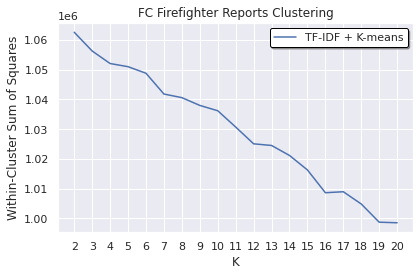

Using embedding_type: TF-IDF
Using Dim. Reduction Settings: None
Using clustering algorithm: K-medoids


 21%|██        | 4/19 [00:00<00:00, 18.68it/s]/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  "its corresponding cluster ({k}).".format(k=k)
 32%|███▏      | 6/19 [00:00<00:00, 18.67it/s]/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  "its corresponding cluster ({k}).".format(k=k)
/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).
  "its corresponding cluster ({k}).".format(k=k)
/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indic

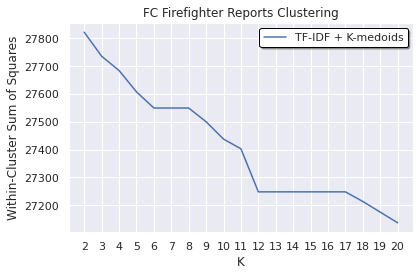

Using embedding_type: TF-IDF
Using Dim. Reduction Settings: {'dim_red_algo_name': 'PCA', 'n_components': 2}
Using clustering algorithm: K-means


100%|██████████| 19/19 [00:02<00:00,  6.61it/s]


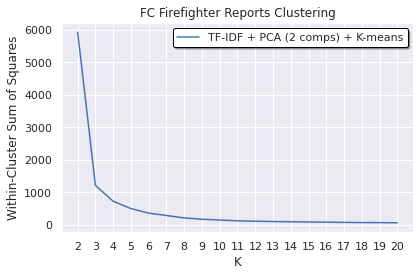

Using embedding_type: TF-IDF
Using Dim. Reduction Settings: {'dim_red_algo_name': 'PCA', 'n_components': 2}
Using clustering algorithm: K-medoids


100%|██████████| 19/19 [00:01<00:00, 12.10it/s]


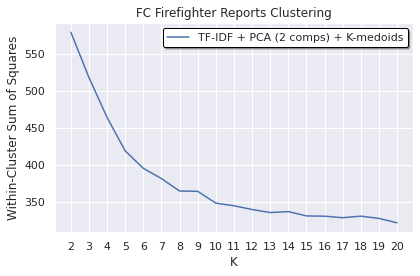

Using embedding_type: TF-IDF
Using Dim. Reduction Settings: {'dim_red_algo_name': 't-SNE', 'n_components': 2}
Using clustering algorithm: K-means


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
100%|██████████| 19/19 [00:02<00:00,  8.31it/s]


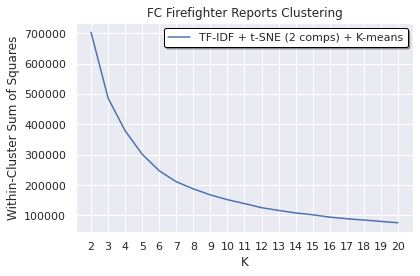

Using embedding_type: TF-IDF
Using Dim. Reduction Settings: {'dim_red_algo_name': 't-SNE', 'n_components': 2}
Using clustering algorithm: K-medoids


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
100%|██████████| 19/19 [00:00<00:00, 39.28it/s]


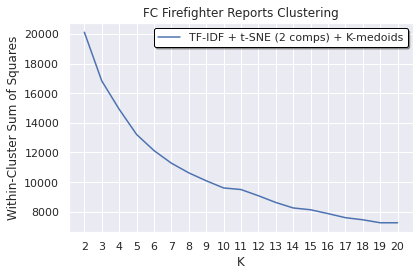

Using embedding_type: BERT
Using Dim. Reduction Settings: None
Using clustering algorithm: K-means


100%|██████████| 19/19 [00:26<00:00,  1.39s/it]


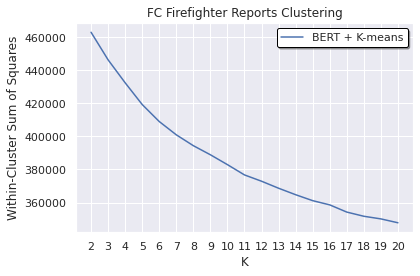

Using embedding_type: BERT
Using Dim. Reduction Settings: None
Using clustering algorithm: K-medoids


100%|██████████| 19/19 [00:01<00:00, 17.81it/s]


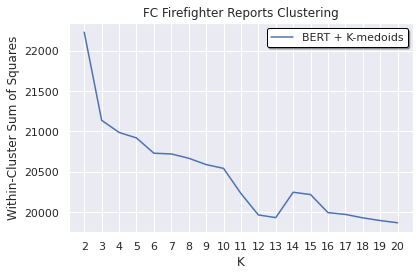

Using embedding_type: BERT
Using Dim. Reduction Settings: {'dim_red_algo_name': 'PCA', 'n_components': 2}
Using clustering algorithm: K-means


100%|██████████| 19/19 [00:03<00:00,  4.95it/s]


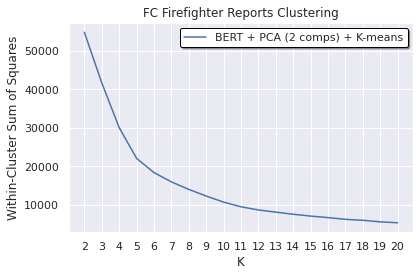

Using embedding_type: BERT
Using Dim. Reduction Settings: {'dim_red_algo_name': 'PCA', 'n_components': 2}
Using clustering algorithm: K-medoids


100%|██████████| 19/19 [00:00<00:00, 30.20it/s]


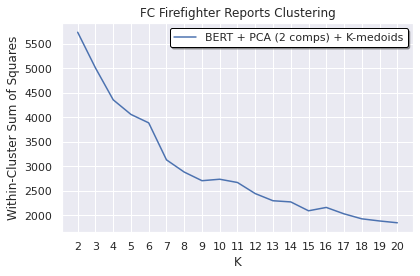

Using embedding_type: BERT
Using Dim. Reduction Settings: {'dim_red_algo_name': 't-SNE', 'n_components': 2}
Using clustering algorithm: K-means


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
100%|██████████| 19/19 [00:01<00:00,  9.59it/s]


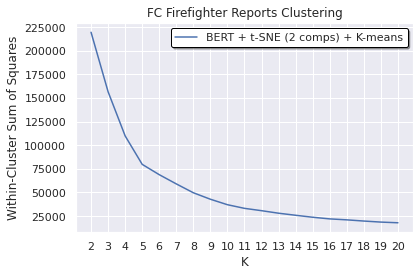

Using embedding_type: BERT
Using Dim. Reduction Settings: {'dim_red_algo_name': 't-SNE', 'n_components': 2}
Using clustering algorithm: K-medoids


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
100%|██████████| 19/19 [00:00<00:00, 25.68it/s]


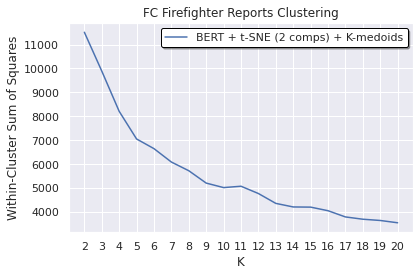

In [ ]:
wcss_df, wcss_scores = clustering_tuning(embedding_dict, title = TUNING_TITLE, save_path = ELBOW_PLOT_PATH)

We break up the Latexified WCSS scores tables into hyperparameter combos that use TFIDF embeddings and those that use BERT embeddings to more easily fit the tables on one page each

In [ ]:
from url_text_module import (
    latexify_wcss_df
)

In [ ]:
latexified_wcss_df = latexify_wcss_df(wcss_df, [f'K = {K}' for K in range(2, 21)])

In [ ]:
tfidf_latexified_df = latexified_wcss_df[latexified_wcss_df[EMBEDDING_TYPE_NAME] == TFIDF_NAME]
tfidf_latexified_df.to_csv(join(ELBOW_PLOT_PATH, 'latexified_tfidf_wcss_scores.csv'), index = False)
bert_latexified_df = latexified_wcss_df[latexified_wcss_df[EMBEDDING_TYPE_NAME] == BERT_NAME]
bert_latexified_df.to_csv(join(ELBOW_PLOT_PATH, 'latexified_bert_wcss_scores.csv'), index = False)

### Visualize the clustering of hyperparameter combinations which resulted in having an elbow in the above experiments and also had low WCSS scores

In [ ]:
from url_text_module import (
    visualize_cluster_results,
    save_cluster_dfs
)

In [ ]:
num_data_points_to_show =  20 #@param {type: "integer"}

In [ ]:
from url_text_module import (
    DIMENSIONALITY_REDUCTION_ALGORITHM_NAME,
    NUM_COMPONENTS_NAME,
    PCA_NAME,
    TSNE_NAME,
    CLUSTERING_ALGORITHM_NAME,
    NUM_CLUSTERS_NAME,
    KMEDOIDS_NAME,
)

### TF-IDF (Unigram) + PCA (2 comps) + K-medoids (8 clusters)

In [ ]:
X_options = {EMBEDDING_TYPE_NAME: TFIDF_NAME}
dim_red_options = {
    DIMENSIONALITY_REDUCTION_ALGORITHM_NAME: PCA_NAME, 
    NUM_COMPONENTS_NAME: 2
}
cluster_options = {
    CLUSTERING_ALGORITHM_NAME: KMEDOIDS_NAME,
    NUM_CLUSTERS_NAME: 8
}
X, cluster_dfs_list = visualize_cluster_results(
    data_df,
    embedding_dict,
    TOKENS_COL,
    X_options = X_options,
    dim_red_options = dim_red_options,
    cluster_options = cluster_options,
    num_data_points_to_show = num_data_points_to_show,
    translations_col_name = TRANSLATIONS_COL,
    seed = SEED,
)

## TF-IDF + t-SNE + K-medoids (14 clusters)

In [ ]:
X_options = {EMBEDDING_TYPE_NAME: TFIDF_NAME}
dim_red_options = {
    DIMENSIONALITY_REDUCTION_ALGORITHM_NAME: TSNE_NAME, 
    NUM_COMPONENTS_NAME: 2
}
cluster_options = {
    CLUSTERING_ALGORITHM_NAME: KMEDOIDS_NAME,
    NUM_CLUSTERS_NAME: 14
}
X, cluster_dfs_list = visualize_cluster_results(
    data_df,
    embedding_dict,
    TOKENS_COL,
    X_options = X_options,
    dim_red_options = dim_red_options,
    cluster_options = cluster_options,
    num_data_points_to_show = num_data_points_to_show,
    translations_col_name = TRANSLATIONS_COL,
    seed = SEED,
)

### BERT + K-medoids (12 clusters)

In [ ]:
X_options = {EMBEDDING_TYPE_NAME: BERT_NAME}
dim_red_options = None
cluster_options = {
    CLUSTERING_ALGORITHM_NAME: KMEDOIDS_NAME,
    NUM_CLUSTERS_NAME: 12
}
X, cluster_dfs_list = visualize_cluster_results(
    data_df,
    embedding_dict,
    TOKENS_COL,
    X_options = X_options,
    dim_red_options = dim_red_options,
    cluster_options = cluster_options,
    num_data_points_to_show = num_data_points_to_show,
    translations_col_name = TRANSLATIONS_COL,
    seed = SEED,
)

### BERT + PCA (2 comps) + K-medoids (9 clusters)

In [ ]:
X_options = {EMBEDDING_TYPE_NAME: BERT_NAME}
dim_red_options = {
    DIMENSIONALITY_REDUCTION_ALGORITHM_NAME: PCA_NAME, 
    NUM_COMPONENTS_NAME: 2
}
cluster_options = {
    CLUSTERING_ALGORITHM_NAME: KMEDOIDS_NAME,
    NUM_CLUSTERS_NAME: 9
}
X, cluster_dfs_list = visualize_cluster_results(
    data_df,
    embedding_dict,
    TOKENS_COL,
    X_options = X_options,
    dim_red_options = dim_red_options,
    cluster_options = cluster_options,
    num_data_points_to_show = num_data_points_to_show,
    translations_col_name = TRANSLATIONS_COL,
    seed = SEED,
)

### BERT + t-SNE (2 comps) + K-medoids (9 clusters)

In [ ]:
cluster_category_names = {
    0: 'Rescue (activites/requests)',
    1: 'Road Closure by the City',
    2: 'River Water Level and Corresponding Warning for EOC/FD',
    3: 'Impassable Roads (due to flood/obstacles/damage)',
    4: 'Residential Areas/Buildings in Flood (Risk)',
    5: 'Landslide/Fallen Tree',
    6: 'FD Activities/Weather Warning/Flood Control Alert',
    7: 'Areas with Flood Risk',
    8: 'Areas where FD activities are happening'
}
PATH_TO_CLUSTERING_OUTPUT_PLOTS = join(CLUSTERING_PLOTS_DIR, 'BERT_t-SNE_K-medoids')
X_options = {EMBEDDING_TYPE_NAME: BERT_NAME}
dim_red_options = {
    DIMENSIONALITY_REDUCTION_ALGORITHM_NAME: TSNE_NAME, 
    NUM_COMPONENTS_NAME: 2
}
cluster_options = {
    CLUSTERING_ALGORITHM_NAME: KMEDOIDS_NAME,
    NUM_CLUSTERS_NAME: 9
}
filename = f'{X_options[EMBEDDING_TYPE_NAME]}_{dim_red_options[DIMENSIONALITY_REDUCTION_ALGORITHM_NAME]}_{cluster_options[CLUSTERING_ALGORITHM_NAME]}_clustering.png'
X, cluster_dfs_list = visualize_cluster_results(
    data_df,
    embedding_dict,
    TOKENS_COL,
    X_options = X_options,
    dim_red_options = dim_red_options,
    cluster_options = cluster_options,
    num_data_points_to_show = num_data_points_to_show,
    translations_col_name = TRANSLATIONS_COL,
    seed = SEED,
    # cluster_category_names = cluster_category_names,
    path = join(PATH_TO_CLUSTERING_OUTPUT_PLOTS, filename)
)

save_cluster_dfs(
    cluster_dfs_list, 
    TOKENS_COL, 
    PATH_TO_CLUSTERING_OUTPUT_PLOTS, 
    num_data_points_to_keep = 20, 
    num_top_tfidf_n_grams = 20,
    tfidf_vect_options = tfidf_options,
    translation_col_name = TRANSLATIONS_COL
)